In [281]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [282]:
heart=pd.read_csv('heartdisease_data.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [283]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0
199,62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [284]:
df=pd.DataFrame(data=heart)
df.iloc[:,:-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,4,140,260,0,1,112,1,3,2,?,?
1,44,1,4,130,209,0,1,127,0,0,?,?,?
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?
196,62,1,1,?,139,0,1,?,?,?,?,?,?
197,55,1,4,122,223,1,1,100,0,0,?,?,6
198,58,1,4,?,385,1,2,?,?,?,?,?,?


In [285]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [197]:
df.shape

(200, 14)

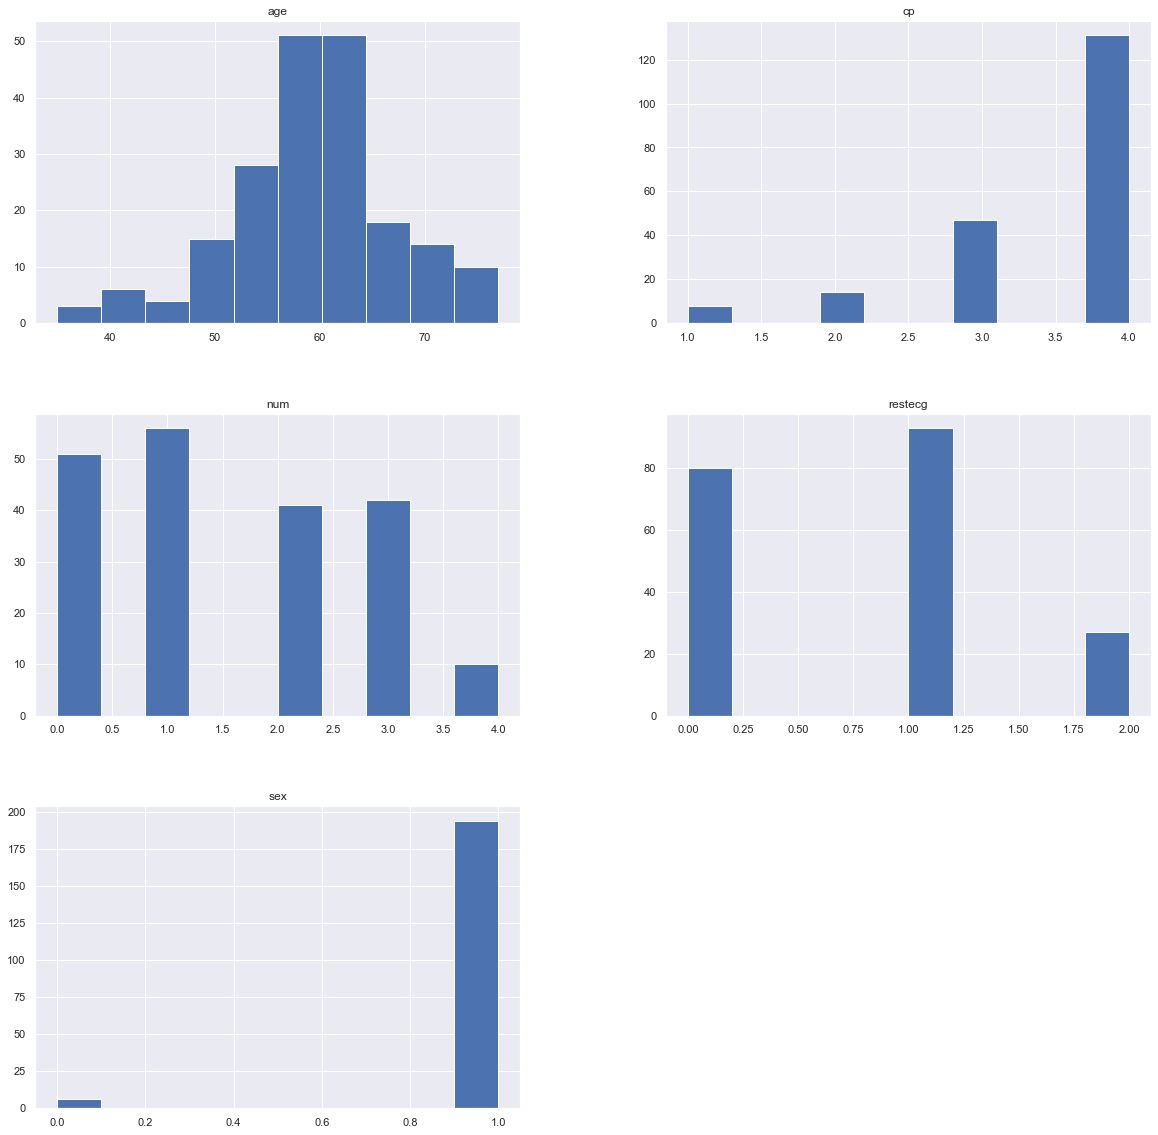

In [167]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6fe9f6c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6fe9fabc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6fe9f6188>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6fe9fdb48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6fe9fdc48>],
 'means': []}

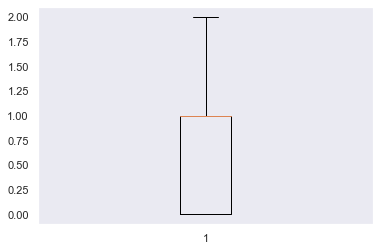

In [168]:
plt.boxplot(df['restecg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6f770f508>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6f770fdc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6f770da08>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6f7713d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6f7718bc8>],
 'means': []}

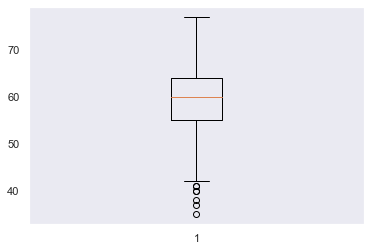

In [59]:
plt.boxplot(df['age'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1d6f7760e48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1d6f7760bc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1d6f771e448>,
 'cbars': <matplotlib.collections.LineCollection at 0x1d6f776c848>}

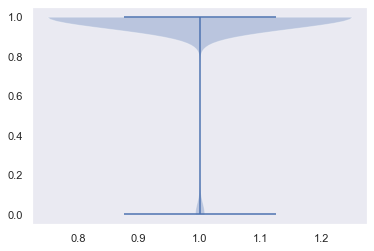

In [60]:
plt.violinplot(df['sex'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1d6f77cb0c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1d6f77c4f08>,
 'cmins': <matplotlib.collections.LineCollection at 0x1d6f77cbb08>,
 'cbars': <matplotlib.collections.LineCollection at 0x1d6f77d19c8>}

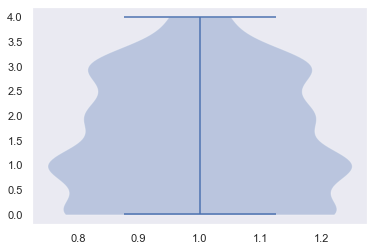

In [61]:
plt.violinplot(df['num'])

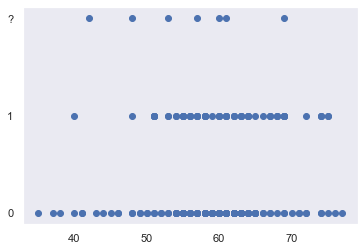

In [62]:
plt.scatter(x='age',y='fbs',data=df)

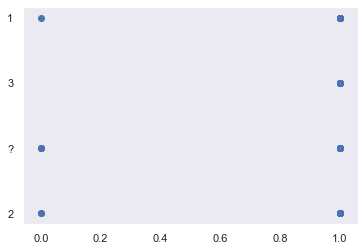

In [63]:
plt.scatter('sex','slope',data=df)

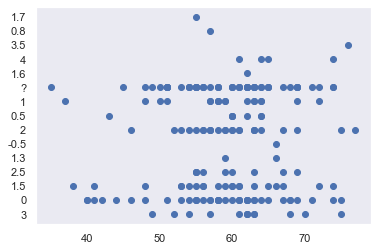

In [64]:
plt.scatter('age','oldpeak',cmap='sex',data=df)

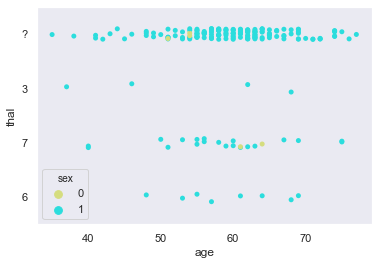

In [65]:
sns.stripplot('age','thal',hue='sex',data=df,palette='rainbow_r')

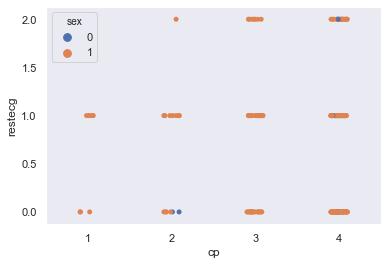

In [66]:
sns.stripplot('cp','restecg',hue='sex',data=df)

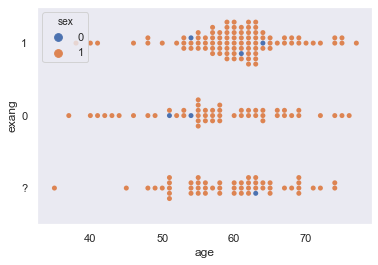

In [67]:
sns.swarmplot('age','exang',hue='sex',data=df)

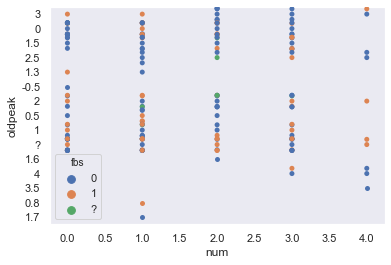

In [68]:
sns.swarmplot('num','oldpeak',hue='fbs',data=df)

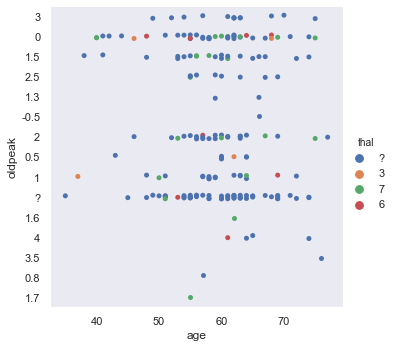

In [69]:
sns.catplot('age','oldpeak',hue='thal',data=df)

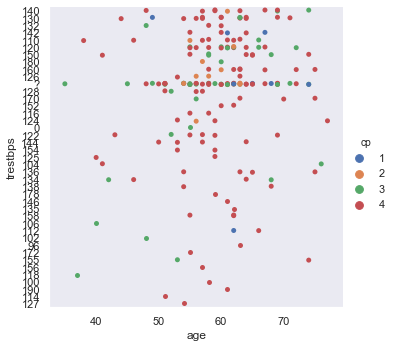

In [70]:
sns.catplot('age','trestbps',hue='cp',data=df)

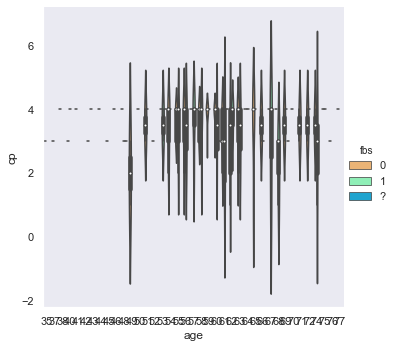

In [71]:
sns.catplot('age','cp',hue='fbs',data=df,kind='violin',palette='rainbow_r')

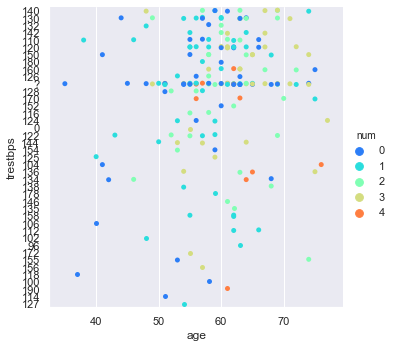

In [72]:
sns.set_style('darkgrid')
sns.catplot('age','trestbps',hue='num',data=df,kind='strip',palette='rainbow')

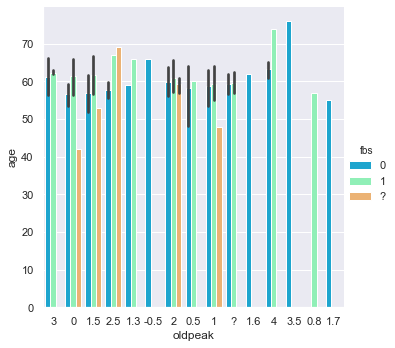

In [73]:
sns.catplot('oldpeak','age',hue='fbs',data=df,kind='bar',palette='rainbow')

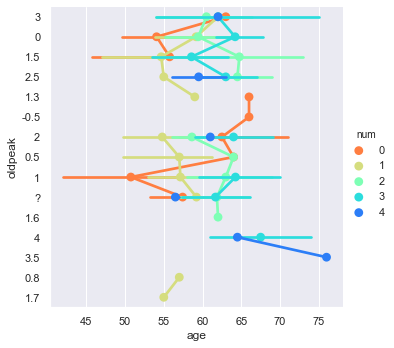

In [74]:
sns.catplot('age','oldpeak',hue='num',data=df,kind='point',palette='rainbow_r')

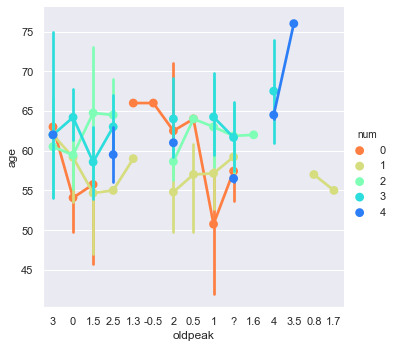

In [75]:
sns.catplot('oldpeak','age',hue='num',data=df,kind='point',palette='rainbow_r')

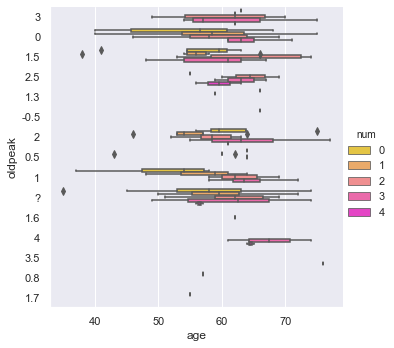

In [76]:
sns.catplot('age','oldpeak',hue='num',data=df,kind='box',palette='spring_r')

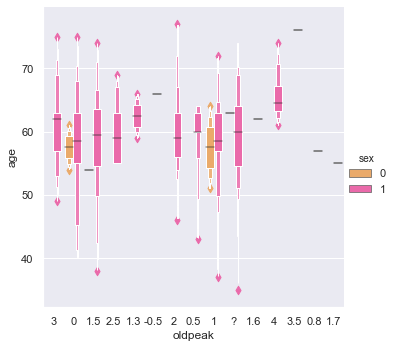

In [77]:
sns.catplot('oldpeak','age',hue='sex',data=df,kind='boxen',palette='spring_r')

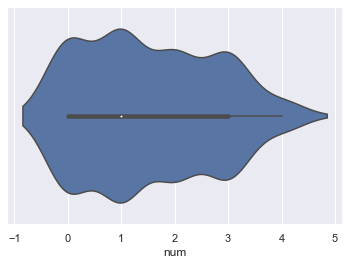

In [78]:
sns.violinplot(df['num'])

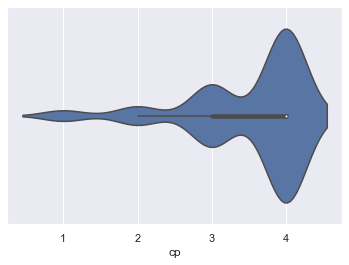

In [79]:
sns.violinplot(df['cp'])

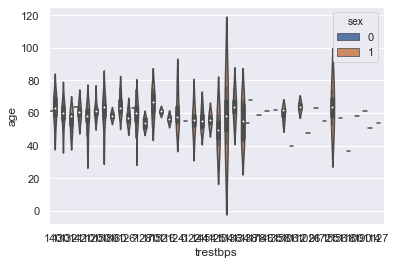

In [80]:
sns.violinplot('trestbps','age',hue='sex',data=df)

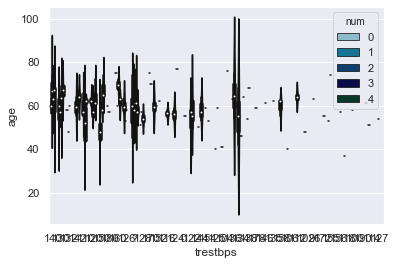

In [81]:
sns.violinplot('trestbps','age',hue='num',data=df,palette='ocean_r')

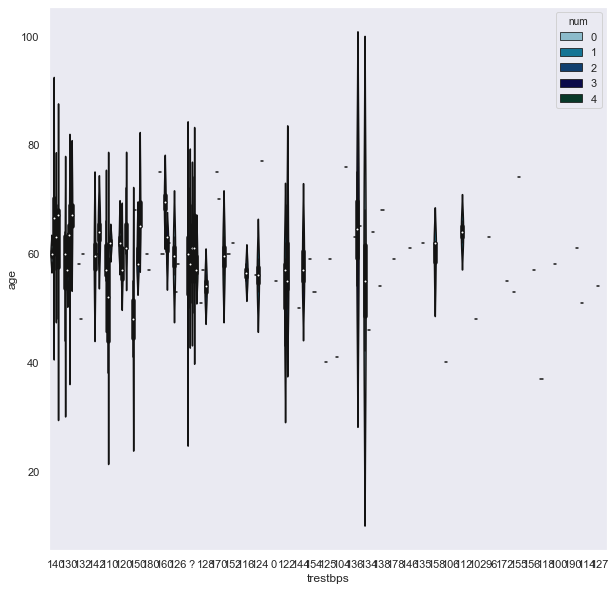

In [82]:
plt.figure(figsize=(10,10))
sns.set(style='dark')
sns.violinplot('trestbps','age',hue='num',data=df,palette='ocean_r')

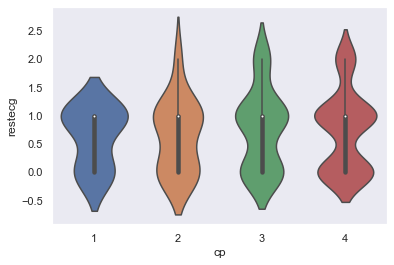

In [83]:
sns.violinplot('cp','restecg',data=df)

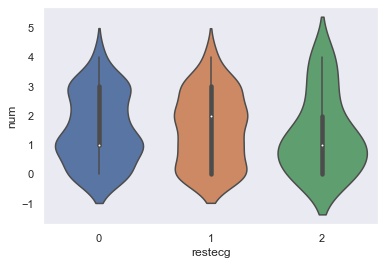

In [84]:
sns.violinplot('restecg','num',data=df)

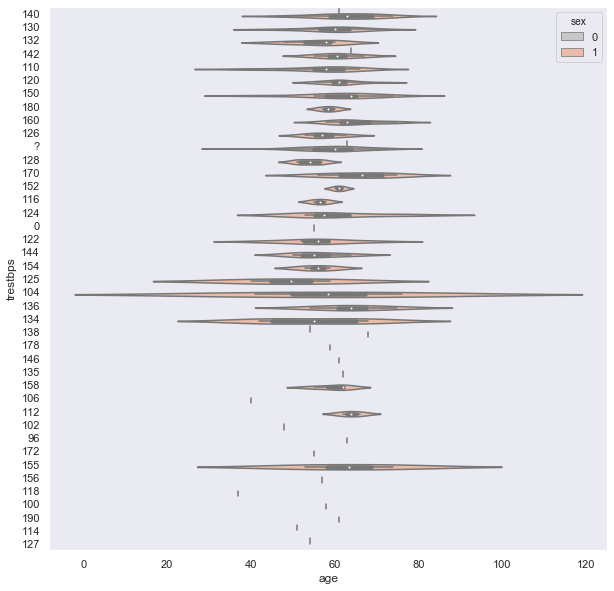

In [85]:
plt.figure(figsize=(10,10))
sns.violinplot('age','trestbps',hue='sex',data=df,palette='RdGy_r')

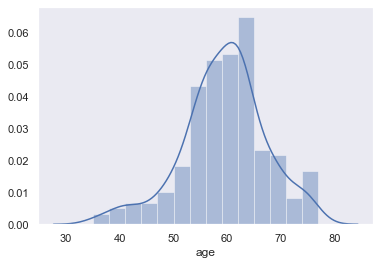

In [86]:
sns.distplot(df['age'])

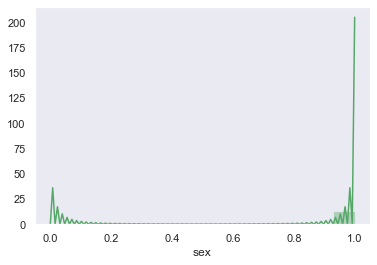

In [87]:
sns.distplot(df['sex'],color='g')

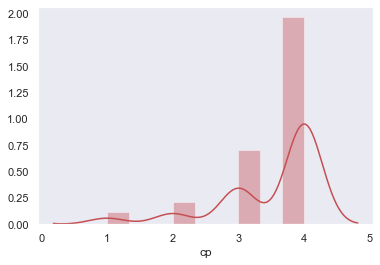

In [88]:
sns.distplot(df['cp'],color='r')

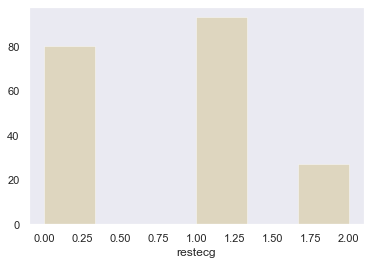

In [101]:
sns.distplot(df['restecg'],kde=False,color='y')

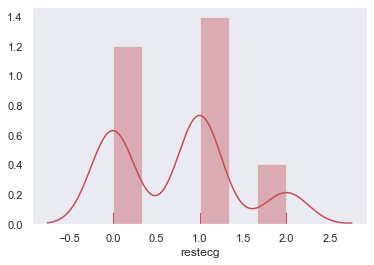

In [102]:
sns.distplot(df['restecg'],rug=True,color='r')

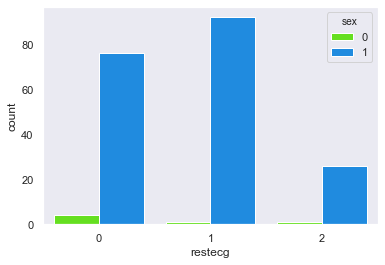

In [107]:
sns.countplot('restecg',hue='sex',data=df,color='g',palette='gist_rainbow')

In [47]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

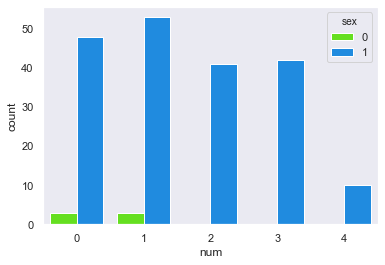

In [108]:
sns.countplot('num',hue='sex',data=df,color='g',palette='gist_rainbow')

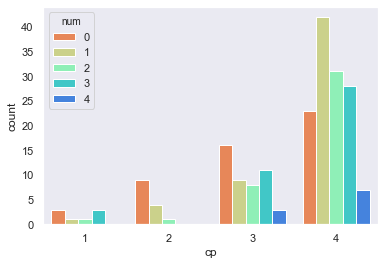

In [111]:
sns.countplot('cp',hue='num',data=df,color='g',palette='rainbow_r')

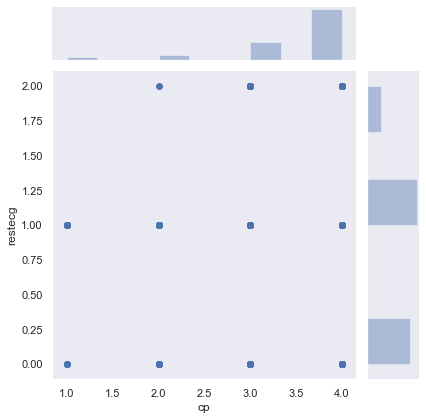

In [89]:
sns.jointplot('cp','restecg',data=df)

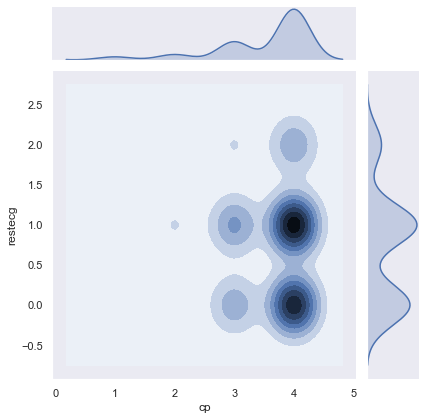

In [112]:
sns.jointplot('cp','restecg',data=df,kind='kde')

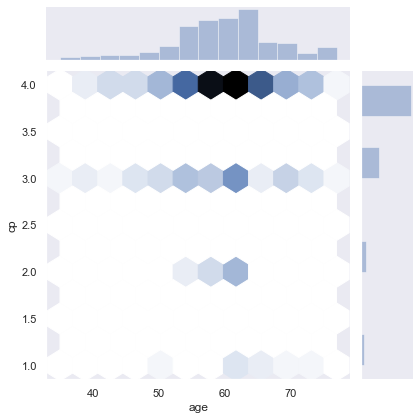

In [113]:
sns.jointplot('age','cp',data=df,kind='hex')

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    200 non-null object
chol        200 non-null object
fbs         200 non-null object
restecg     200 non-null int64
thalach     200 non-null object
exang       200 non-null object
oldpeak     200 non-null object
slope       200 non-null object
ca          200 non-null object
thal        200 non-null object
num         200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [287]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [288]:
df[['trestbps','chol','fbs','thalach','exang','oldpeak','slope','ca','thal']]=df[['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal']].replace('?',nan)
print(df)

     age  sex  cp trestbps chol fbs  restecg thalach exang oldpeak slope   ca  \
0     63    1   4      140  260   0        1     112     1       3     2  NaN   
1     44    1   4      130  209   0        1     127     0       0   NaN  NaN   
2     60    1   4      132  218   0        1     140     1     1.5     3  NaN   
3     55    1   4      142  228   0        1     149     1     2.5     1  NaN   
4     66    1   3      110  213   1        2      99     1     1.3     2  NaN   
..   ...  ...  ..      ...  ...  ..      ...     ...   ...     ...   ...  ...   
195   54    0   4      127  333   1        1     154     0       0   NaN  NaN   
196   62    1   1      NaN  139   0        1     NaN   NaN     NaN   NaN  NaN   
197   55    1   4      122  223   1        1     100     0       0   NaN  NaN   
198   58    1   4      NaN  385   1        2     NaN   NaN     NaN   NaN  NaN   
199   62    1   2      120  254   0        2      93     1       0   NaN  NaN   

    thal  num  
0    NaN   

In [289]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [290]:
df[['trestbps','chol','fbs','thalach','exang','oldpeak','slope','ca','thal']].replace(to_replace=np.nan,value=0,inplace=True)

In [291]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

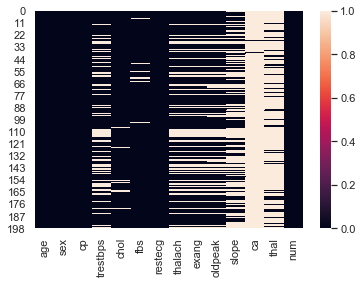

In [292]:
sns.heatmap(df.isnull())

In [293]:
df.shape

(200, 14)

In [294]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['age', 'sex', 'cp', 'restecg', 'num'], dtype='object'),
 dtype('O'): Index(['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
        'thal'],
       dtype='object')}

In [295]:
trest=pd.get_dummies(df['trestbps'],drop_first=True,prefix='trestbps')
chol=pd.get_dummies(df['chol'],drop_first=True,prefix='chol')
fbs=pd.get_dummies(df['fbs'],drop_first=True,prefix='fbs')
thal=pd.get_dummies(df['thalach'],drop_first=True,prefix='thalach')
ex=pd.get_dummies(df['exang'],drop_first=True,prefix='exang')
old=pd.get_dummies(df['oldpeak'],drop_first=True,prefix='oldpeak')
slop=pd.get_dummies(df['slope'],drop_first=True,prefix='slope')
ca=pd.get_dummies(df['ca'],drop_first=True,prefix='ca')
tha=pd.get_dummies(df['thal'],drop_first=True,prefix='thal')

In [296]:
df.drop(['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal'],axis=1,inplace=True)

In [297]:
for i in [trest,chol,fbs,thal,ex,old,slop,ca,tha]:
    df=pd.concat([df,i],axis=1)

In [298]:
df.head()

,age,sex,cp,restecg,num,trestbps_100,trestbps_102,trestbps_104,trestbps_106,trestbps_110,...,oldpeak_1.7,oldpeak_2,oldpeak_2.5,oldpeak_3,oldpeak_3.5,oldpeak_4,slope_2,slope_3,thal_6,thal_7
0,63,1,4,1,2,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,44,1,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60,1,4,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,55,1,4,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,66,1,3,2,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [299]:
x=df.drop('num',axis=1)
x

,age,sex,cp,restecg,trestbps_100,trestbps_102,trestbps_104,trestbps_106,trestbps_110,trestbps_112,...,oldpeak_1.7,oldpeak_2,oldpeak_2.5,oldpeak_3,oldpeak_3.5,oldpeak_4,slope_2,slope_3,thal_6,thal_7
0,63,1,4,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,44,1,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60,1,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,55,1,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,66,1,3,2,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,62,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,55,1,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
198,58,1,4,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
y=df['num']
y

0      2
1      0
2      2
3      1
4      0
      ..
195    1
196    0
197    2
198    0
199    1
Name: num, Length: 200, dtype: int64

In [301]:
x.shape

(200, 218)

In [302]:
y.shape

(200,)

In [303]:
from sklearn.preprocessing import LabelEncoder

In [304]:
le=LabelEncoder()

In [305]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=41)

In [306]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

In [307]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

0.36363636363636365
[[5 3 1 1 0]
 [6 7 2 2 0]
 [2 1 3 0 0]
 [4 2 3 1 0]
 [0 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.29      0.50      0.37        10
           1       0.50      0.41      0.45        17
           2       0.33      0.50      0.40         6
           3       0.25      0.10      0.14        10
           4       0.00      0.00      0.00         1

    accuracy                           0.36        44
   macro avg       0.28      0.30      0.27        44
weighted avg       0.36      0.36      0.35        44

0.5
[[ 6  3  1  0  0]
 [ 4 12  1  0  0]
 [ 1  3  2  0  0]
 [ 1  4  3  2  0]
 [ 0  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.52      0.71      0.60        17
           2       0.29      0.33      0.31         6
           3       1.00      0.20      0.33        10
           4       0.00      0.00      0.00         1

    

In [308]:
from sklearn.model_selection import KFold

In [320]:
acc_results = []
auc_results = []
names = []
col = ['Algorithm', 'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
for name, model in enumerate(models):
    kfold =KFold(n_splits=10, random_state=40)  

    cv_acc_results =cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')

    acc_results.append(cv_acc_results)
    names.append(name)
    df_results.loc[i] = [name,round(cv_acc_results.mean()*100, 2),round(cv_acc_results.std()*100, 2)]
    i += 1
df_results.sort_values(by=['Algorithm'], ascending=True)


,Algorithm,Accuracy Mean,Accuracy STD
0,0.0,33.21,9.45
1,1.0,21.29,8.52
2,2.0,28.29,7.44
3,3.0,24.88,6.95
4,4.0,30.00,13.75


In [321]:
from sklearn.externals import joblib

In [322]:
svc=SVC()

In [323]:
joblib.dump(svc,'heartfile.obj')                            # In this dataset highest accuracy score give SVC model.

['heartfile.obj']